# 模型思想

- 为每个指标定权
- 指标数据离散程度越大，权重越大

## 熵的概念

- 物理熵：系统越混乱，熵越大
- 信息熵：不确定性越大，熵越大
    - 对一个事件发生的不确定性程度（概率）的度量
    - 与物理熵呈反比
    - 反映离散随机变量$X$的平均信息量，概率越小，信息量越大

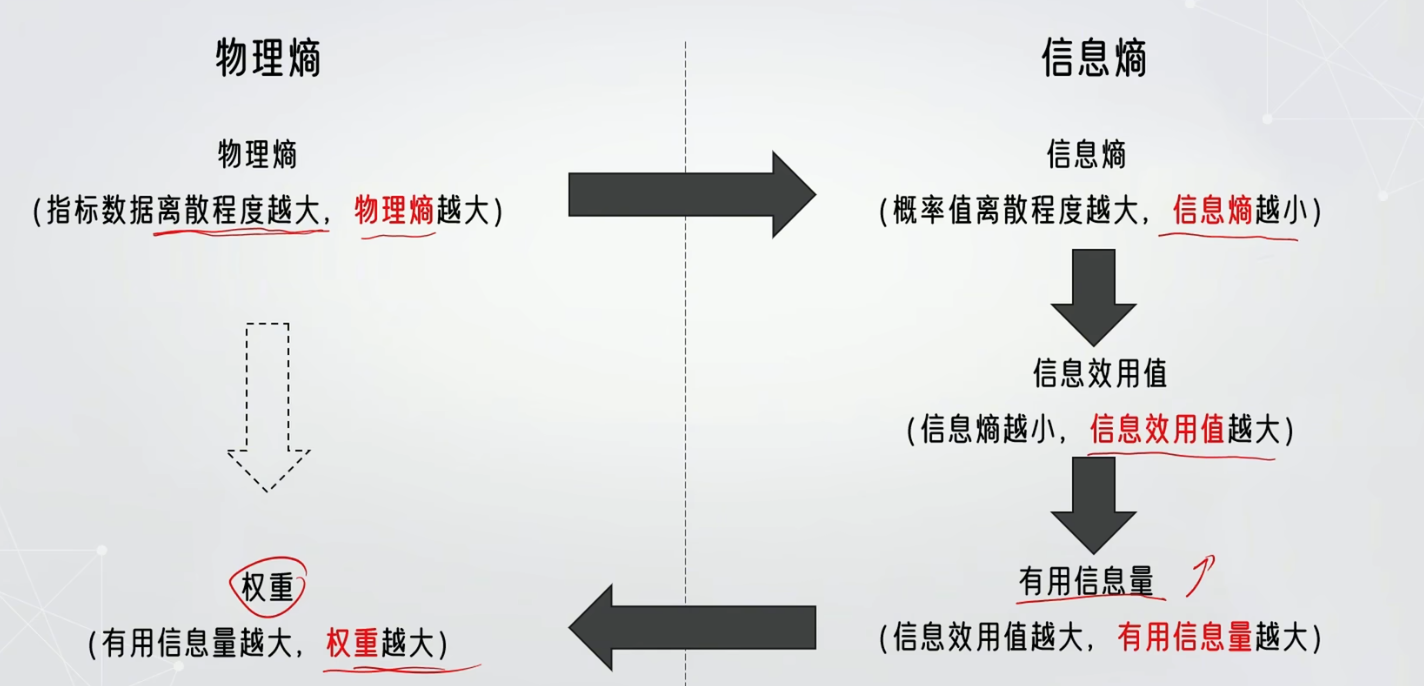


# 求解步骤（结合Topsis法）

1. 原始矩阵正向化（将指标数据转换为极大型指标）
2. 正向矩阵标准化
3. 标准化矩阵归一化（调整至0～1）：$p_{ij} = \frac{z_{ij}}{\sum_{i=1}^n z_{ij}}$
4. 求信息熵、信息效用值、熵权
    - 信息熵：$e_j = -\frac{1}{\ln n} \sum_{i=1}^{n} p_{ij} \ln(p_{ij})$
    - 信息效用值：$d_j = 1 - e_j$
    - 熵权：$W_j = \frac{d_j}{\sum_{j=1}^{m} d_j}$

In [2]:
# 基础语法：np.log(x)、np.log2(x)、np.log10(x)
import numpy as np
x = np.e
print(x)
print(np.log(x))

y = 9
print(np.log10(x))

2.718281828459045
1.0
0.4342944819032518


In [1]:
import numpy as np  # 导入numpy库，并简称为np

# 定义一个自定义的对数函数mylog，用于处理输入数组中的零元素
def mylog(p):
    n = len(p)  # 获取输入向量p的长度
    lnp = np.zeros(n)  # 创建一个长度为n，元素都为0的新数组lnp
    for i in range(n):  # 对向量p的每一个元素进行循环
        if p[i] == 0:  # 如果当前元素的值为0
            lnp[i] = 0  # 则在lnp中对应位置也设置为0，因为log(0)是未定义的，这里我们规定为0
        else:
            lnp[i] = np.log(p[i])  # 如果p[i]不为0，则计算其自然对数并赋值给lnp的对应位置
    return lnp  # 返回计算后的对数数组

# 定义一个指标矩阵X
X = np.array([[5/7, 1/3, 2/3], [0, 1, 1/3], [1, 0, 1], [3/7, 2/3, 0]])

Z = X / np.sqrt(np.sum(X**2, axis=0))

print("标准化矩阵 Z = ")
print(Z)  # 打印标准化矩阵Z

# 计算熵权所需的变量和矩阵初始化
n, m = Z.shape  # 获取标准化矩阵Z的行数和列数
D = np.zeros(m)  # 初始化一个长度为m的数组D，用于保存每个指标的信息效用值

# 计算每个指标的信息效用值
for i in range(m):  # 遍历Z的每一列
    x = Z[:, i]  # 获取Z的第i列，即第i个指标的所有数据
    p = x / np.sum(x)  # 对第i个指标的数据进行归一化处理，得到概率分布p
    print(p)
    # 使用自定义的mylog函数计算p的对数。需要注意的是，如果p中含有0，直接使用np.log会得到-inf，这里使用自定义函数避免这个问题
    e = -np.sum(p * mylog(p)) / np.log(n)  # 根据熵的定义计算第i个指标的信息熵e
    D[i] = 1 - e  # 根据信息效用值的定义计算D[i]

# 根据信息效用值计算各指标的权重
W = D / np.sum(D)  # 将信息效用值D归一化，得到各指标的权重W

print("权重 W = ")
print(W)  # 打印得到的权重数组W

标准化矩阵 Z = 
[[0.5488213  0.26726124 0.53452248]
 [0.         0.80178373 0.26726124]
 [0.76834982 0.         0.80178373]
 [0.32929278 0.53452248 0.        ]]
[0.33333333 0.         0.46666667 0.2       ]
[0.16666667 0.5        0.         0.33333333]
[0.33333333 0.16666667 0.5        0.        ]
权重 W = 
[0.31358769 0.34320616 0.34320616]
